## BRITISH AIRWAYS: FORAGE



---

## Web scraping and analysis

 We will use a package called `BeautifulSoup` to collect the data from the web. Once the data is collected and saved it into a `.csv` file we can start with analysis.

### Scraping data from Skytrax.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. 

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | 1. Ground crew in Heathrow...
1,✅ Trip Verified | London Heathrow to Gibralta...
2,✅ Trip Verified | First time flying British Ai...
3,Not Verified | I flew London to Cairo and ret...
4,Not Verified | Absolutely the worst experienc...


In [9]:
df.to_csv("Documents/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## SENTIMENT ANALYSIS

In [10]:
pip install nltk textblob pandas


     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     ----- --------------------------------- 81.9/636.8 kB 4.8 MB/s eta 0:00:01
     -------------------- ----------------- 337.9/636.8 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\tessa


In [21]:
import pandas as pd
from textblob import TextBlob

# Loading the CSV file with specified encoding
file_path = r"C:\Users\tessa\Documents\BA_reviews.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')  

#column name containing the text data for sentiment analysis
text_column = 'DATA'

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(str(text))  # Ensure the data is treated as a string
    # Classify the polarity of the text (positive, negative, or neutral)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the specified column and create a new column 'sentiment'
df['sentiment'] = df[text_column].apply(analyze_sentiment)

# Print the DataFrame with the sentiment analysis results
print(df)


                                                  DATA  \
0    1. Ground crew in Heathrow left 60 passengers ...   
1    London Heathrow to Gibraltar on 24th October 2...   
2    First time flying British Airways and I would ...   
3    lew London to Cairo and return in October 2023...   
4    olutely the worst experience ever.  Flew into ...   
..                                                 ...   
995  Boston to London. World Traveler seats. Nice h...   
996  London to Athens. We were fortunate to get exi...   
997  London to Johannesburg. So impressed by the la...   
998  Newark to Bangalore return via London on BA pr...   
999  London to Berlin scheduled for 21st December. ...   

                                            Unnamed: 1   Unnamed: 2  \
0                                                  NaN          NaN   
1    on was inefficient though and poorly managed a...  to be seen.   
2                                                  NaN          NaN   
3                  

In [22]:

# Count the number of positive, negative, and neutral sentiments
sentiment_counts = df['sentiment'].value_counts()

# Print the count of positive, negative, and neutral sentiments
print("Number of Positive Sentiments:", sentiment_counts['Positive'])
print("Number of Negative Sentiments:", sentiment_counts['Negative'])
print("Number of Neutral Sentiments:", sentiment_counts['Neutral'])


Number of Positive Sentiments: 645
Number of Negative Sentiments: 344
Number of Neutral Sentiments: 11


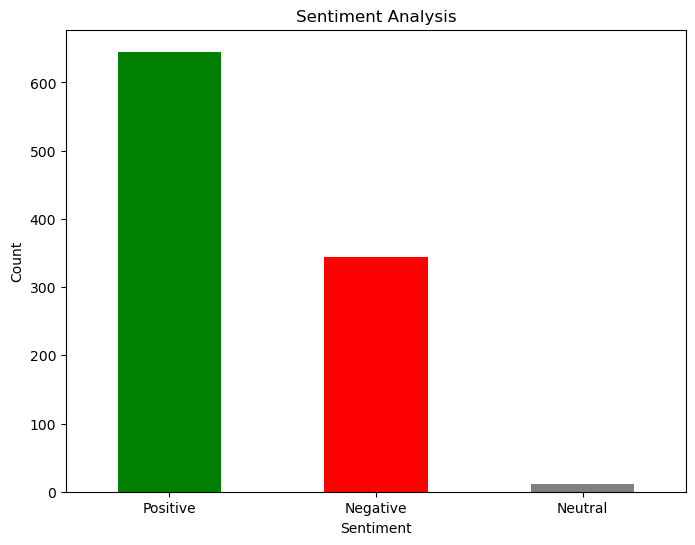

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = {
    'Positive': 645,
    'Negative': 344,
    'Neutral': 11
}

sentiment_series = pd.Series(sentiment_counts)

# Plotting
plt.figure(figsize=(8, 6))
sentiment_series.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()


## TOPIC MODELLING

In [24]:
pip install gensim nltk


     ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
     ---------------------------------------- 67.1/67.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=20772309708afb01a62831aed45abbd320a3ba68d3616fe203da6184b4b032b2
  Stored in directory: c:\users\tessa\appdata\local\pip\cache\wheels\69\f5\e5\18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3522 sha256=0213f5481091d919e7a8d849c83cba0ee37ae133105a88be59485598f6da8f68
  Stored in directory: c:\users\tessa\appdata\local\pip\cache\wheels\9d\ff\2f\afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
Successfully built fst-pso miniful
Note: you may need to restart the kernel to use 

In [27]:
import nltk

# Download the stopwords dataset
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tessa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim import corpora
import string
file_path = r"C:\Users\tessa\Documents\BA_reviews.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
text_column = 'DATA'

# Tokenize data
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  
    tokens = [token for token in tokens if token.isalpha()] 
    tokens = [token for token in tokens if token not in stop_words]  
    return tokens

df['tokens'] = df[text_column].apply(preprocess_text)

# Create a dictionary representation of the documents
dictionary = Dictionary(df['tokens'])

# Filter out words that occur less than 20 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Create a corpus based on the dictionary
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Train the LDA model
num_topics = 5 
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15, random_state=42)

# Print the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.017*"us" + 0.015*"london" + 0.014*"hours" + 0.014*"told" + 0.013*"airways" + 0.013*"british" + 0.012*"customer" + 0.012*"cancelled" + 0.011*"would" + 0.011*"service"')
(1, '0.022*"staff" + 0.019*"boarding" + 0.019*"crew" + 0.018*"time" + 0.016*"passengers" + 0.014*"cabin" + 0.014*"check" + 0.012*"gate" + 0.012*"minutes" + 0.012*"one"')
(2, '0.044*"class" + 0.040*"business" + 0.026*"economy" + 0.021*"service" + 0.019*"seat" + 0.015*"cabin" + 0.014*"meal" + 0.013*"one" + 0.012*"get" + 0.011*"seats"')
(3, '0.027*"seats" + 0.022*"service" + 0.022*"seat" + 0.022*"airways" + 0.021*"british" + 0.019*"airline" + 0.016*"london" + 0.013*"class" + 0.012*"flights" + 0.012*"business"')
(4, '0.039*"good" + 0.026*"food" + 0.024*"crew" + 0.019*"service" + 0.016*"time" + 0.016*"cabin" + 0.015*"london" + 0.014*"seat" + 0.014*"great" + 0.013*"club"')
